In [2]:
import lightkurve as lk

In [60]:
pixelfile = lk.search_targetpixelfile("Trappist-1")[1].download()

In [61]:
pixelfile

KeplerTargetPixelFile Object (ID: 246199087)

In [62]:
lc = pixelfile.to_lightcurve(method="pld").remove_outliers().flatten()

<AxesSubplot: xlabel='Phase [JD]', ylabel='Normalized Flux'>

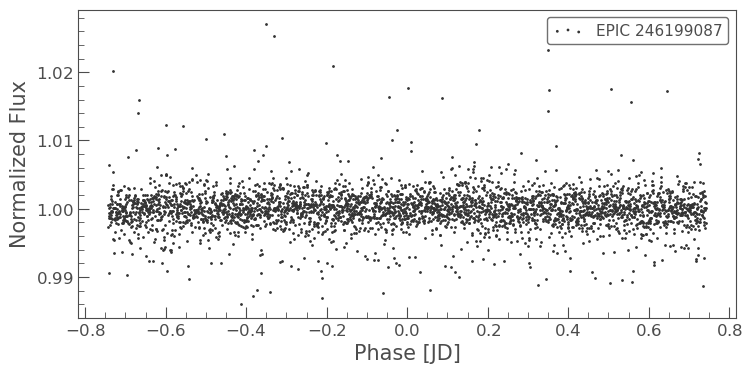

In [63]:
period1 = lc.to_periodogram("bls").period_at_max_power
lc.fold(period).scatter()

In [64]:
planet_t0 = lc.to_periodogram("bls").transit_time_at_max_power
planet_dur = lc.to_periodogram("bls").duration_at_max_power

In [65]:
planet_b_model = lc.to_periodogram("bls").get_transit_model(period=period1,
                                       transit_time=planet_t0,
                                       duration=planet_dur)

<AxesSubplot: xlabel='Phase [JD]', ylabel='Flux'>

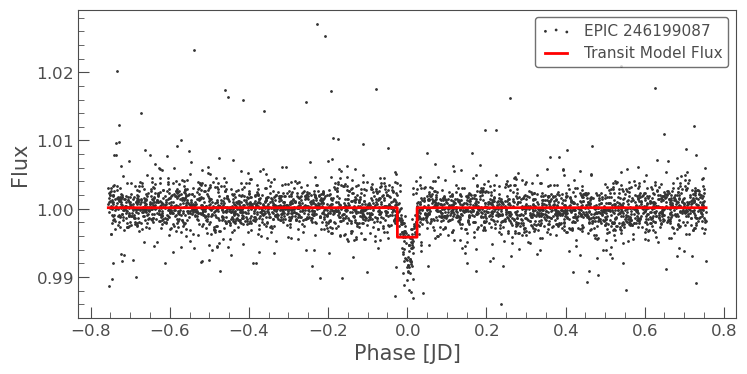

In [66]:
ax = lc.fold(period1, planet_t0).scatter()
planet_b_model.fold(period1, planet_t0).plot(ax=ax, c='r', lw=2)
#ax.set_xlim(-5, 5);